In [ ]:
!pip install japanize_matplotlib

In [1]:
import pandas as pd
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 教師あり学習

## 教師あり学習とは

過去のデータから、既に答えが分かっているもの、<br>
例えば、「1+1=2」や、「野球の出場選手と試合の点数」などなど、

そのようなデータを使って、法則を見つけることによって、<br>
新しい「未知のデータ」を予測していく手法。

ex) 競馬予測、売上予測、AlphaFold...

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

iris_df = pd.DataFrame(X, columns=["がくの長さ", "がくの太さ", "花びらの長さ", "花びらの太さ"])
iris_df["target"] = [str(d).replace("0", "setosa").replace("1", 'versicolor').replace("2", 'virginica') for d in y]
iris_df.head()

がくの長さ  がくの太さ  花びらの長さ  花びらの太さ  target
0    5.1    3.5     1.4     0.2  setosa
1    4.9    3.0     1.4     0.2  setosa
2    4.7    3.2     1.3     0.2  setosa
3    4.6    3.1     1.5     0.2  setosa
4    5.0    3.6     1.4     0.2  setosa

In [3]:
iris_df["target"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## 今回使用するデータについて

iris=「アヤメ」
'setosa', 'versicolor', 'virginica'の３つの種類のアヤメについて調査。

それぞれ、がくの長さ、がくの太さ、花びらの長さ、花びらの太さの４つのデータを持っていて、<br>
これらのデータからアヤメの種類を当てよう！ということです。

[がくの長さ、がくの太さ、花びらの長さ、花びらの太さ] -> 問題<br>
[アヤメの種類] -> 回答

/Users/br171440/.mambaforge_arm64/envs/workspace/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/br171440/.mambaforge_arm64/envs/workspace/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 12367 (\N{HIRAGANA LETTER KU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/br171440/.mambaforge_arm64/envs/workspace/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/br171440/.mambaforge_arm64/envs/workspace/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 38263 (\N{CJK UNIFIED IDEOGRAPH-9577}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/br171440/.mambaforge_arm64/envs/workspace/lib/python3.10/site-packages/seaborn/axisgr

/Users/br171440/.mambaforge_arm64/envs/workspace/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from current font.
  func(*args, **kwargs)
/Users/br171440/.mambaforge_arm64/envs/workspace/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12367 (\N{HIRAGANA LETTER KU}) missing from current font.
  func(*args, **kwargs)
/Users/br171440/.mambaforge_arm64/envs/workspace/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  func(*args, **kwargs)
/Users/br171440/.mambaforge_arm64/envs/workspace/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 38263 (\N{CJK UNIFIED IDEOGRAPH-9577}) missing from current font.
  func(*args, **kwargs)
/Users/br171440/.mambaforge_arm64/envs/workspace/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12373 (\N{HIRAGANA LETTER SA}) missing from 

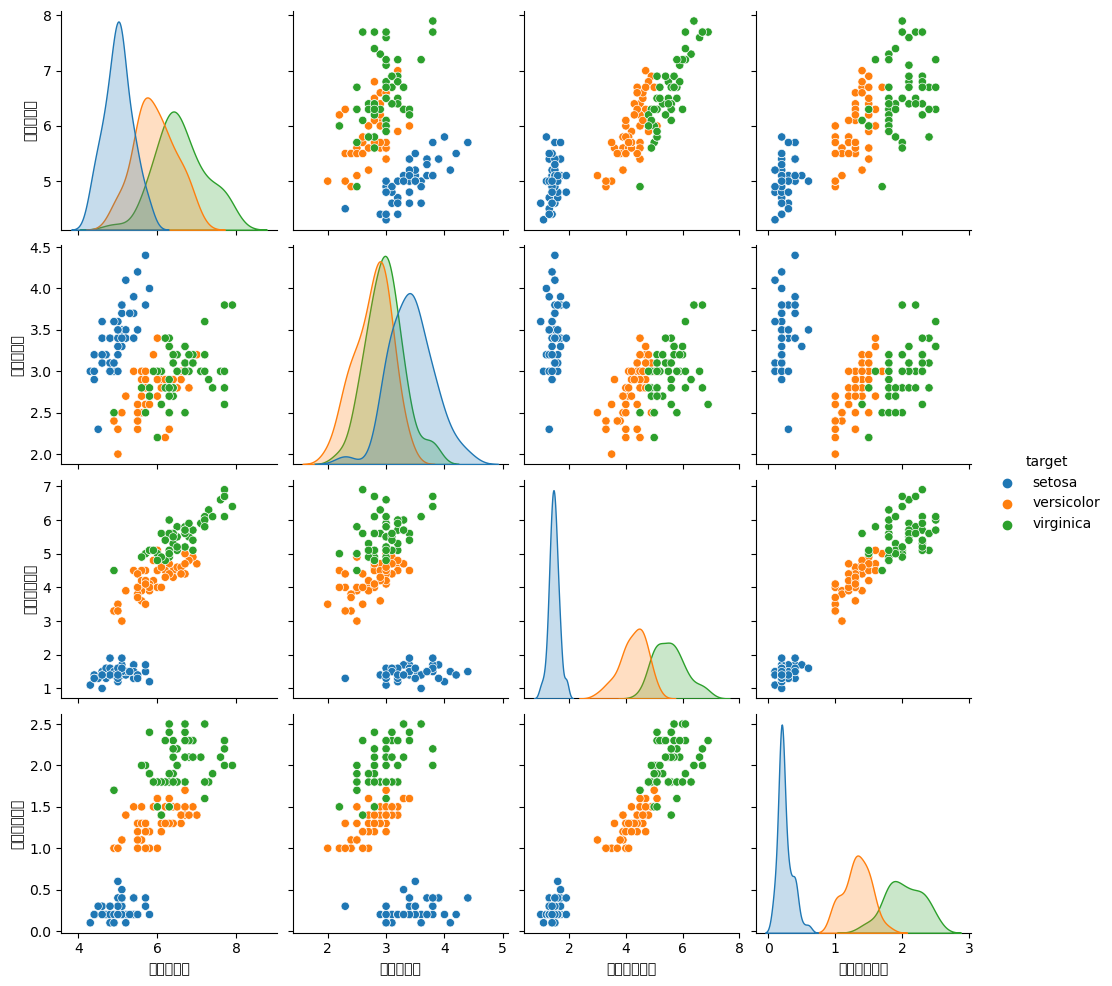

In [4]:
sns.pairplot(data=iris_df, hue="target")

## 過学習について

教師あり学習で、「正解率、100%だった！！」<br>
↑疑ってください。

この特定のデータに特化した特徴を捉えている可能性があります。<br>
ex) 画像認識で、パンダかクマか分別するAI。パンダは日本では上野動物園にしかいないので、過学習すると、上野動物園かそうで無いかで判別する。

汎用ではないモデルができてしまうと、未知のデータの予測には使えなくなってしまう....

### 過学習の対策

学習時に、既知データを「学習データ」と「検証データ」に分け、<br>
評価を行いながら学習をする。
- ホールドアウト(k-fold)
- 交差検証

In [55]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=17)
print("学習データ数")
print(len(X_train), len(y_train))
print("検証データ数")
print(len(X_test), len(y_test))

学習データ数
112 112
検証データ数
38 38


In [56]:
logreg = LogisticRegression(max_iter=3000).fit(X_train, y_train)
print("")
print("Training score: {}".format(logreg.score(X_train, y_train)))
print("Test score    : {}".format(logreg.score(X_test, y_test)))
print("Prediction")


Training score: 0.9821428571428571
Test score    : 0.9736842105263158
Prediction


In [57]:
print("正解 vs 予測")
for i in range(10):
    print("{}   ->   {}".format(y_test[i], logreg.predict(X_test[i].reshape(1, -1))))

正解 vs 予測
0   ->   [0]
1   ->   [1]
2   ->   [2]
1   ->   [1]
2   ->   [2]
2   ->   [2]
1   ->   [1]
2   ->   [2]
1   ->   [1]
2   ->   [2]


## 教師あり学習のモデルの例

### 回帰
- ロジスティクス回帰
- 階層ベイズモデル
- 単回帰
- ニューラルネットワーク
### 分類
- ロジスティクス回帰
- k-近傍法
- 決定木
- SVM

<br>

# 課題１
教師あり学習が使用されている例を３つ調べてください！
(株価予測などなど)

# 教師なし学習

## 教師なし学習とは

学習データに正解を与えずに学習させる方法。<br>
代表的なものとして、「クラスタリング」があります。

近いもの同士でグループを作ることで、特徴を捉えたりします。

### 今回使用するデータ

ワインのデータです。<br>
アルコール度数や、リンゴ酸の量、色の濃さなど、13種類の特徴データからなります。<br>
ここで、今回は「正解データ」を用意していません。

In [58]:
wine = datasets.load_wine()
X = wine.data
y = wine.target

wine_df = pd.DataFrame(X, columns=wine.feature_names)
wine_df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

In [61]:
wine_df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

### 分析を始める前に

アルコール度数や色など、単位の違うものは、数字のばらつきも違うため、結果が変わってしまうことがあります。<br>
例：1780 mm と 1.78 m

特徴を捉えることが目的なので、分散が見れれば、これら値を拡大・縮小しても良いという考えのもと、<br>
標準化や正規化でスケーリングを行います。

標準化：平均が0、標準偏差が1になるように<br>
正規化：最小が0、最大が1になるように

In [63]:
from sklearn import preprocessing
mms = preprocessing.MinMaxScaler()
mms.fit(wine_df)
arr_mms = mms.transform(wine_df)

norm_wine_df = pd.DataFrame(arr_mms,columns=wine["feature_names"])
norm_wine_df.head()

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  0.842105    0.191700  0.572193           0.257732   0.619565   
1  0.571053    0.205534  0.417112           0.030928   0.326087   
2  0.560526    0.320158  0.700535           0.412371   0.336957   
3  0.878947    0.239130  0.609626           0.319588   0.467391   
4  0.581579    0.365613  0.807487           0.536082   0.521739   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.627586    0.573840              0.283019         0.593060   
1       0.575862    0.510549              0.245283         0.274448   
2       0.627586    0.611814              0.320755         0.757098   
3       0.989655    0.664557              0.207547         0.558360   
4       0.627586    0.495781              0.490566         0.444795   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.372014  0.455285                      0.970696  0.561341  
1         0.264505  0.463415                      0.780220  0.550642  
2         0.375427  0.447154                      0.695971  0.646933  
3         0.556314  0.308943                      0.798535  0.857347  
4         0.259386  0.455285                      0.608059  0.325963

In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(norm_wine_df)
pca_2d = pca.transform(norm_wine_df)
pca_2d_df = pd.DataFrame(pca_2d, columns=["PCA_1","PCA_2"])

<AxesSubplot: xlabel='PCA_1', ylabel='PCA_2'>

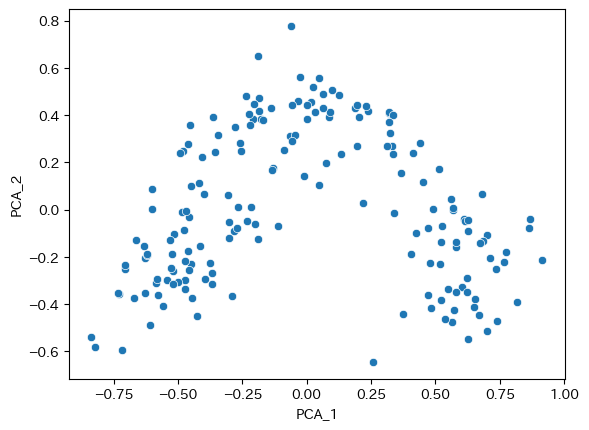

In [67]:
sns.scatterplot(data=pca_2d_df, x="PCA_1", y="PCA_2")

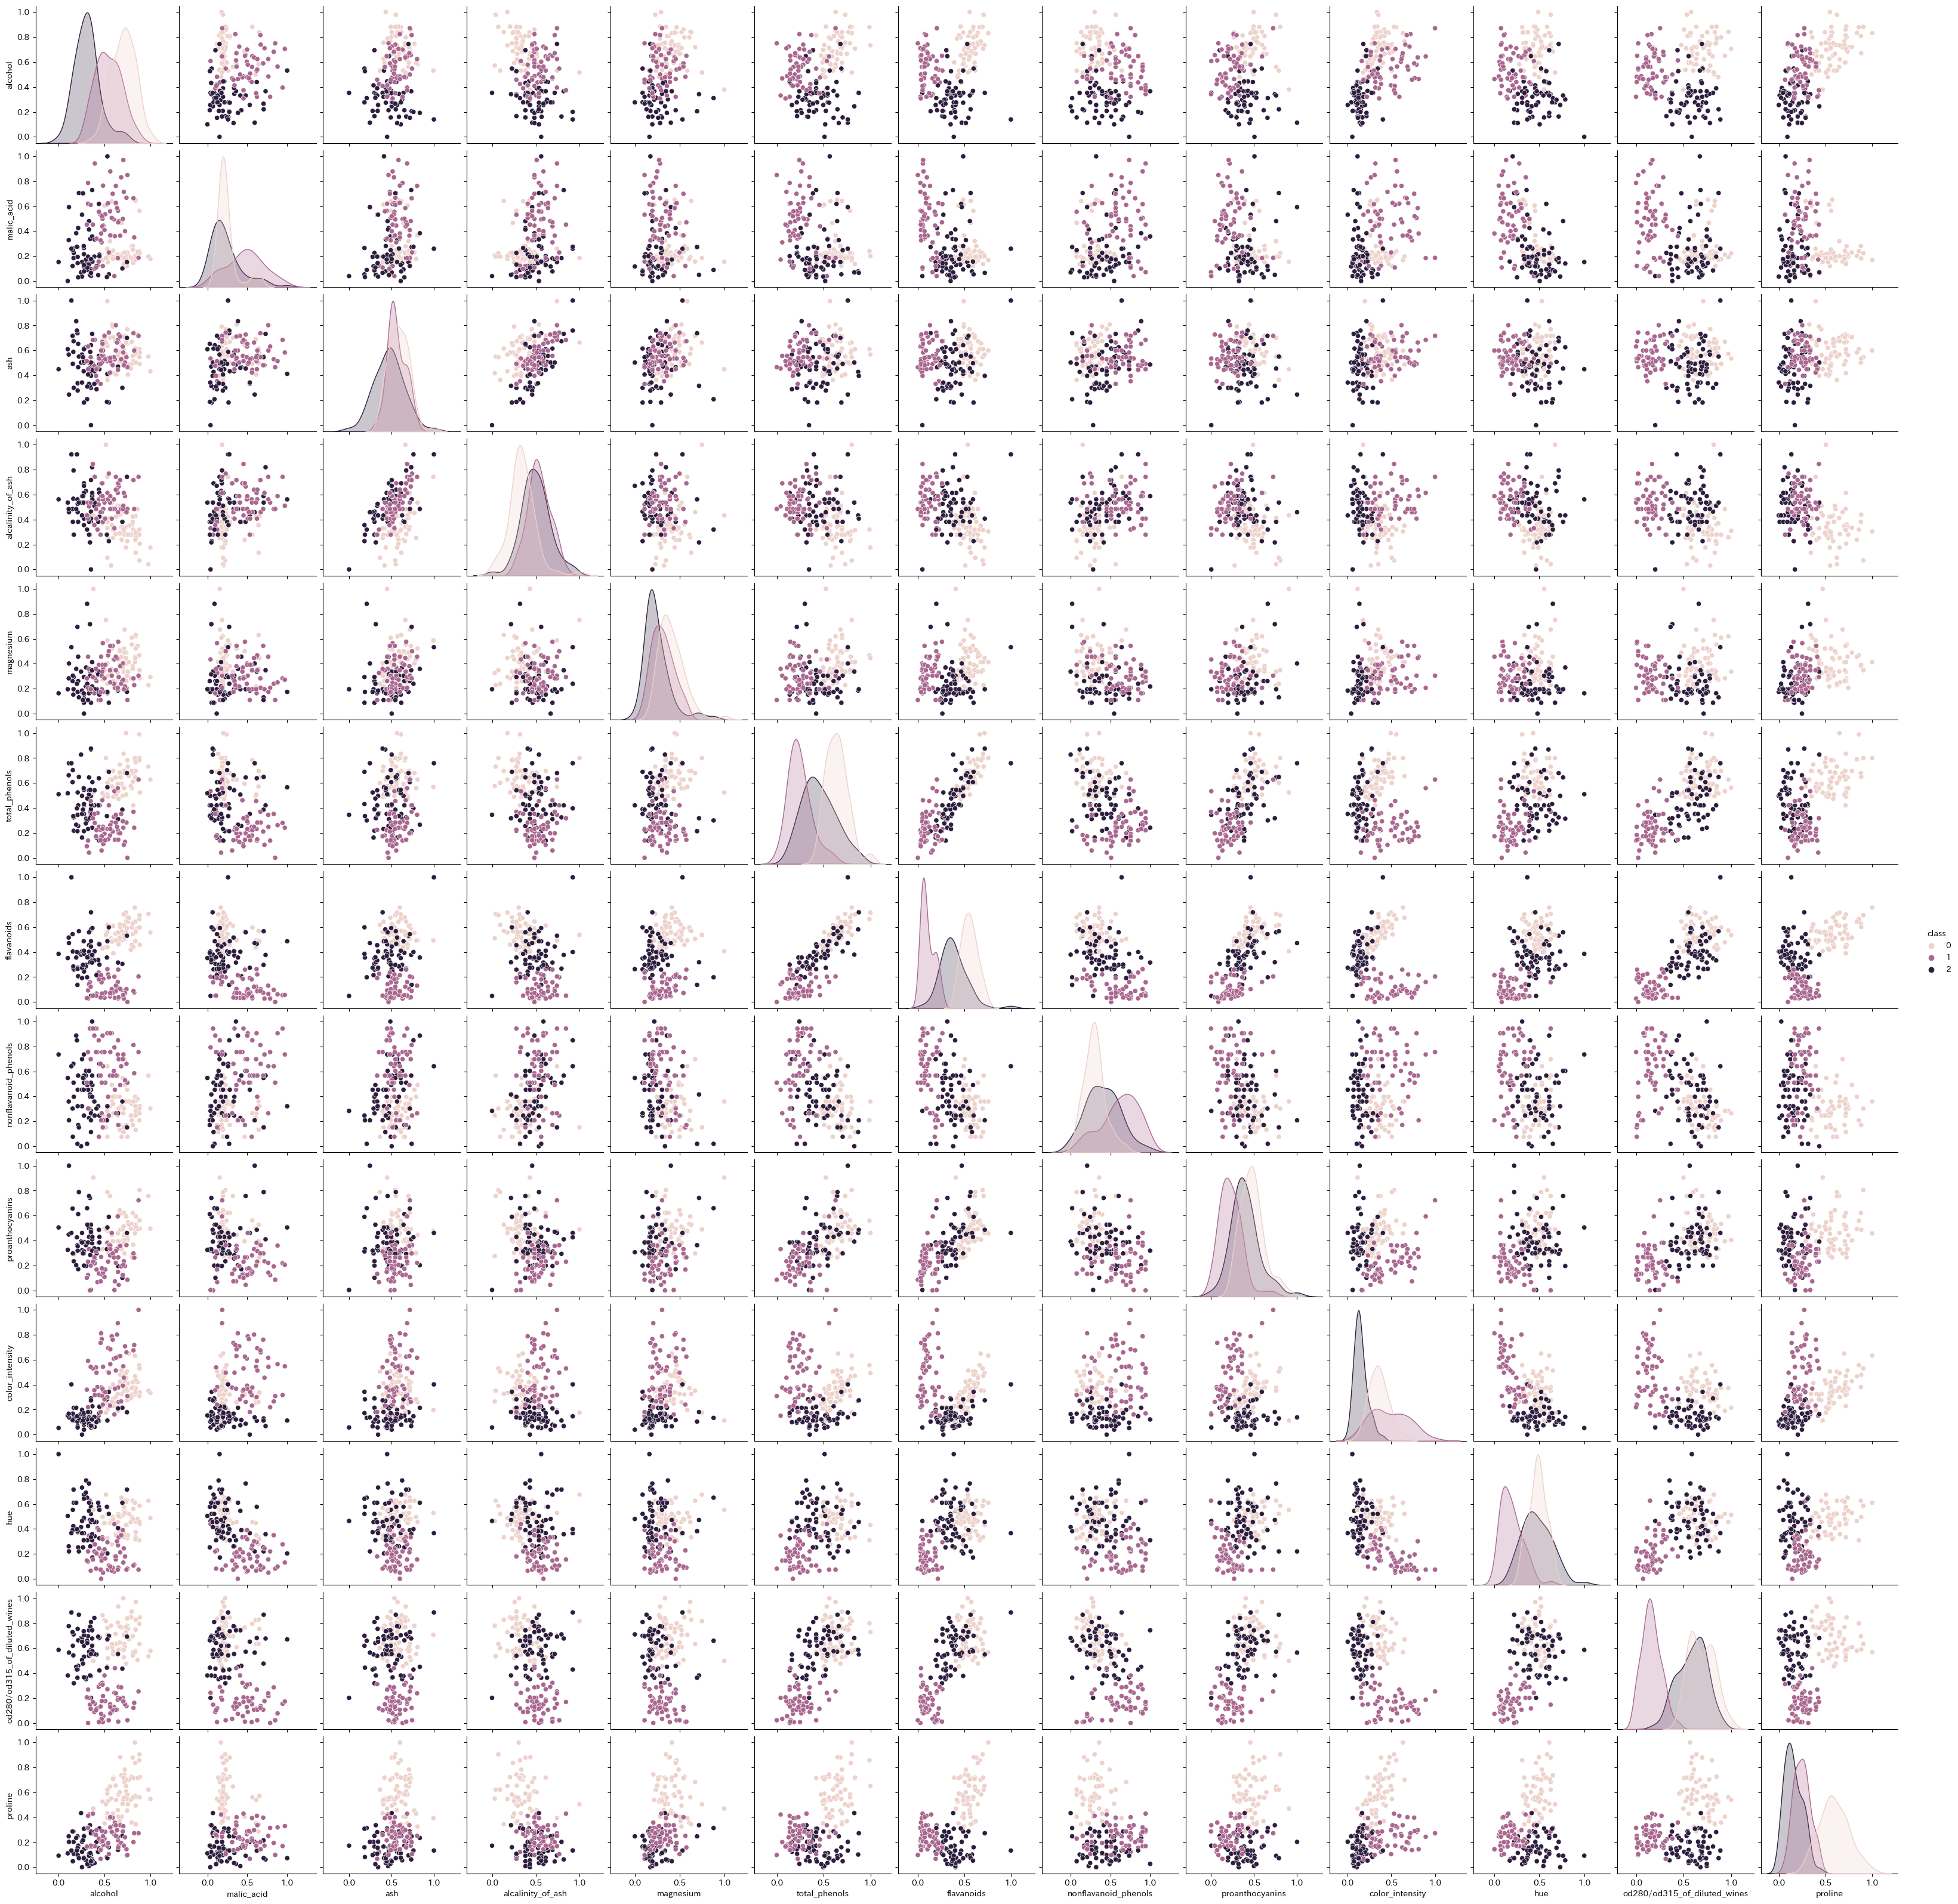

In [69]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=0, init='random')
model.fit(norm_wine_df)
clusters = model.predict(norm_wine_df)

kmeans_df = norm_wine_df.copy()
kmeans_df['class'] = clusters
# クラスタリングデータをプロット
sns.pairplot(data=kmeans_df, hue='class')
plt.show()

## 教師なし学習の注意点

正解が無いので、結果の解釈は自分で行う必要がある。<br>
ex)ここに分類されているワインの種類は、辛くて酸味が強いだろう。

## 教師なし学習の種類

### 主成分分析
- PCA
### 次元削除
- UMAP
- MDS
### クラスタリング
- k-means